<a href="https://colab.research.google.com/github/MarcoChartier/Projet-PFE/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import random
import seaborn as sns

In [108]:
#@title `Paramétrez les variables de départ`
#@markdown Nom de la première activité
ACT1 = 'Clearing the site' #@param {type:"string"}
#@markdown Meilleur temps de la première activité
BEST1 = 3 #@param {type:"number"}
#@markdown Temps millieux de la première activité
ML1 = 6 #@param {type:"number"}
#@markdown Pire temps de la première activité
WORST1 = 6 #@param {type:"number"}
#@markdown Activité critique?
CRIT1 = True #@param {type:"boolean"}


In [109]:
Projet = pd.DataFrame(columns=["Activité",'BEST', 'ML', 'WORST', "AVG","SD", "CRIT"])
Projet["Activité"] = ACT1, "Removing trees", "Subsurface drainage", "Filling playing field/track","Installing artificial playing turf","Excavation", "Pouring concrete footings", "Pouring supports seat galleries", "Erecting pre-cast galleries", "Pouring seats","Steel structure","Roof", "Dressing rooms", "Painting","Lights","Scoreboard"
Projet["BEST"] = BEST1,1,4,11,11,2,3,10,9,3,1,3,3,3,1,2
Projet["ML"] = ML1,2,8,14,12,4,4,10,10,4,2,4,4,3,2,3
Projet["WORST"] = WORST1,3,12,17,13,6,8,10,11,5,3,5,5,6,3,4
Projet["AVG"] =( Projet["BEST"] + 4* Projet["ML"] + Projet["WORST"] )/ 6 
Projet["SD"] = (Projet["WORST"] - Projet["BEST"]) / 6 
Projet["CRIT"] = CRIT1,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True
Projet

,Activité,BEST,ML,WORST,AVG,SD,CRIT
0,Clearing the site,3,6,6,5.5,0.500000,True
1,Removing trees,1,2,3,2.0,0.333333,True
2,Subsurface drainage,4,8,12,8.0,1.333333,False
3,Filling playing field/track,11,14,17,14.0,1.000000,False
4,Installing artificial playing turf,11,12,13,12.0,0.333333,False
5,Excavation,2,4,6,4.0,0.666667,True
6,Pouring concrete footings,3,4,8,4.5,0.833333,True
7,Pouring supports seat galleries,10,10,10,10.0,0.000000,True
8,Erecting pre-cast galleries,9,10,11,10.0,0.333333,True
9,Pouring seats,3,4,5,4.0,0.333333,True


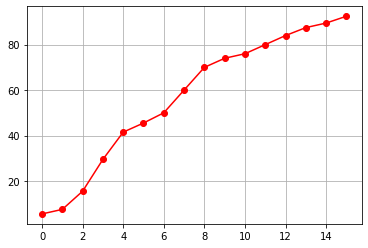

In [110]:
plt.plot(Projet.index,Projet["AVG"].cumsum(), color='red', marker='o', )
plt.grid(True)

In [111]:
#@title `Paramétrez les variables de départ`
#@markdown Nom de la première activité
ACT1P2 = 'Clearing the site' #@param {type:"string"}
#@markdown Meilleur temps de la première activité
BEST1P2 = 3 #@param {type:"number"}
#@markdown Temps millieux de la première activité
ML1P2 = 6 #@param {type:"number"}
#@markdown Pire temps de la première activité
WORST1P2 = 6 #@param {type:"number"}
#@markdown Activité critique?
CRIT1P2 = True #@param {type:"boolean"}

In [112]:
Projet2 = pd.DataFrame(columns=["Activité",'BEST', 'ML', 'WORST', "AVG","SD", "CRIT"])
Projet2["Activité"] = ACT1P2, "Removing trees", "Subsurface drainage", "Filling playing field/track","Installing artificial playing turf","Excavation", "Pouring concrete footings", "Pouring supports seat galleries", "Erecting pre-cast galleries", "Pouring seats","Steel structure","Roof", "Dressing rooms", "Painting","Lights","Scoreboard"
Projet2["BEST"] = BEST1P2,1,4,11,11,2,3,10,11,1,3,6,3,3,3,2
Projet2["ML"] = ML1P2,2,8,14,12,4,4,12,13,4,4,8,4,5,4,3
Projet2["WORST"] = WORST1P2,3,12,17,13,6,8,14,15,7,8,10,5,7,8,4
Projet2["AVG"] =( Projet["BEST"] + 4* Projet["ML"] + Projet["WORST"] )/ 6 
Projet2["SD"] = (Projet["WORST"] - Projet["BEST"]) / 6 
Projet2["CRIT"] = CRIT1P2,True,False,False,False,True,True,True,True,True,False,False,False,False,False,True
Projet2

,Activité,BEST,ML,WORST,AVG,SD,CRIT
0,Clearing the site,3,6,6,5.5,0.500000,True
1,Removing trees,1,2,3,2.0,0.333333,True
2,Subsurface drainage,4,8,12,8.0,1.333333,False
3,Filling playing field/track,11,14,17,14.0,1.000000,False
4,Installing artificial playing turf,11,12,13,12.0,0.333333,False
5,Excavation,2,4,6,4.0,0.666667,True
6,Pouring concrete footings,3,4,8,4.5,0.833333,True
7,Pouring supports seat galleries,10,12,14,10.0,0.000000,True
8,Erecting pre-cast galleries,11,13,15,10.0,0.333333,True
9,Pouring seats,1,4,7,4.0,0.333333,True


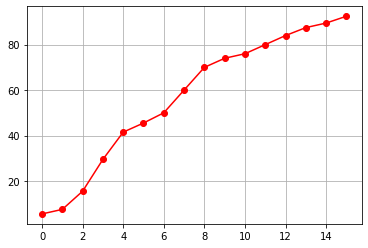

In [113]:
plt.plot(Projet2.index, Projet2["AVG"].cumsum(), color='red', marker='o',)
plt.grid(True)

In [123]:
#@title
BEST = 0
WORST = 0
AVG = 0
SD = 0

BEST2 = 0
WORST2 = 0
AVG2 = 0
SD2 = 0

for i in range(len(Projet)) : 
  if Projet["CRIT"][i] == True : 
    BEST = BEST + Projet["BEST"][i]
    WORST = WORST + Projet["WORST"][i]
    AVG = AVG + Projet["AVG"][i]
    SD = SD + Projet["SD"][i]**2

for i in range(len(Projet2)) : 
  if Projet2["CRIT"][i] == True : 
    BEST2 = BEST2 + Projet2["BEST"][i]
    WORST2 = WORST2 + Projet2["WORST"][i]
    AVG2 = AVG2 + Projet2["AVG"][i]
    SD2 = SD2 + Projet2["SD"][i]**2

# create a dictionary
# with student names as key
# values as subject details
data = {'BEST': [{'P1': BEST, 'P2': BEST2}],
        'AVG':[{'P1': AVG, 'P2': AVG2},],
        "WORST" :[{"P1":WORST,"P2":WORST2}],
        "SD" : [{"P1":SD, "P2":SD2}],
        "SD/2" : [{"P1":SD*0.5, "P2":SD2*0.5}]}
  
# get the list of data
# using items() method
for key, values in data.items():
    for i in values:
        print(key, " : ", i)

BEST  :  {'P1': 40, 'P2': 33}
AVG  :  {'P1': 53.0, 'P2': 43.0}
WORST  :  {'P1': 66, 'P2': 63}
SD  :  {'P1': 2.166666666666667, 'P2': 1.8333333333333335}
SD/2  :  {'P1': 1.0833333333333335, 'P2': 0.9166666666666667}


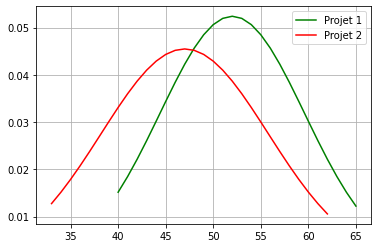

In [115]:
#@title
x_axis = np.arange(BEST,WORST)
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
x_axis2 = np.arange(BEST2,WORST2)
mean2 = statistics.mean(x_axis2)
sd2 = statistics.stdev(x_axis2)
plt.plot(x_axis, norm.pdf(x_axis,mean, sd), color='g', label='Projet 1')
plt.plot(x_axis2, norm.pdf(x_axis2,mean2, sd2), color='r', label='Projet 2')
plt.grid(True)
plt.legend()
plt.show()

PROBABILITY (P1 ≥ P2) =
PROBABILITY (P1 − P2 ≥ 0)

AVG(X − Y) = AVG(X) − AVG(Y)
VAR(X − Y) = VAR(X) + VAR(Y)
STDEV(X − Y) ≠ STDEV(X) + STDEV(Y)

PROBABILITY (DIFFERENCE ≥ 0)
= 1 − PROBABILITY (DIFFERENCE < 0)
= 1 − NORMDIST(0,DIFFAVG , SDVAR, 1) = %

In [129]:
from statistics import NormalDist
DIFFAVG = AVG2-AVG
SDDIST = SD+SD2
SDVAR = (SD+SD2)**0.5
print((1-norm(loc=DIFFAVG,scale=SDVAR).cdf(0))*100,"%")

2.866515719235352e-05 %


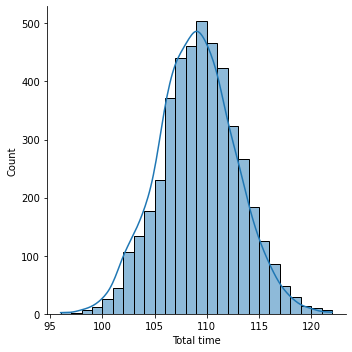

In [130]:
#@markdown Nombre de simulation
nbsim = 4500 #@param {type:"slider", min:500, max:50000, step:500} 
sim = nbsim
tab_time = np.array([])
for j in range(sim) :
  time = 0
  for i in range(len(Projet)) : 
    BEST = Projet2["BEST"][i]
    WORST = Projet2["WORST"][i]
    ML = Projet2["ML"][i]
    time = time + (round(random.triangular(BEST,WORST,ML),0))
  tab_time = np.append(tab_time,time)
  time = pd.DataFrame(data={'Total time': tab_time})
p = sns.displot(time, x="Total time",  kde=True,binwidth=1)

In [121]:
#@title
time.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total time,16000.0,109.049312,3.868729,96.0,106.0,109.0,112.0,124.0


In [119]:
#@markdown % du projet qui est plus petit que la cible
CIBLE = 115 #@param {type:"number"}
print(sum(time["Total time"]<CIBLE)/sim*100,"%")

91.9 %


---

In [136]:
Projet2 = pd.DataFrame(columns=["Activité", 'ML',"PERSO","PLAN", "CRIT"])
Projet2["Activité"] = ACT1P2, "Removing trees", "Subsurface drainage", "Filling playing field/track","Installing artificial playing turf","Excavation", "Pouring concrete footings", "Pouring supports seat galleries", "Erecting pre-cast galleries", "Pouring seats","Steel structure","Roof", "Dressing rooms", "Painting","Lights","Scoreboard"
Projet2["ML"] = ML1P2,2,8,14,12,4,4,12,13,4,4,8,4,5,4,3
Projet2["PERSO"] = 2,2,2,3,3,3,3,4,4,2,4,2,2,2,2,1
Projet2["PLAN"] = Projet2["ML"] * Projet2["PERSO"]
Projet2["CRIT"] = CRIT1P2,True,False,False,False,True,True,True,True,True,False,False,False,False,False,True
Projet2

,Activité,ML,PERSO,PLAN,CRIT
0,Clearing the site,6,2,12,True
1,Removing trees,2,2,4,True
2,Subsurface drainage,8,2,16,False
3,Filling playing field/track,14,3,42,False
4,Installing artificial playing turf,12,3,36,False
5,Excavation,4,3,12,True
6,Pouring concrete footings,4,3,12,True
7,Pouring supports seat galleries,12,4,48,True
8,Erecting pre-cast galleries,13,4,52,True
9,Pouring seats,4,2,8,True


https://www.pmi.org/learning/library/evm-cpm-evaluate-project-performance-6355

In [178]:
dummy = 0
Projet2 = pd.DataFrame(columns=["Activité", 'BAC',"PV","AC", "EV"])
Projet2["Activité"] = "Preparation", "Field work", "Ground work","Seating","Construction"
Projet2["BAC"] = 24000,141000,36000,162000,91500
Projet2["PV"] = 24000,6000,9000,0,0
Projet2["AC"] = 27000,9000,9000,0,0
Projet2["EV"] = Projet2["PV"] * Projet2["AC"]
Projet2

,Activité,BAC,PV,AC,EV
0,Preparation,24000,24000,27000,648000000
1,Field work,141000,6000,9000,54000000
2,Ground work,36000,9000,9000,81000000
3,Seating,162000,0,0,0
4,Construction,91500,0,0,0


In [189]:
# create a dictionary
# with student names as key
# values as subject details
data = {'Total': [{'BAC': sum(Projet2["BAC"][:5])}, {'PV': sum(Projet2["PV"][:5])},{"AC":sum(Projet2["AC"][:5])},{"EV":sum(Projet2["EV"][:5])}]}
  
# get the list of data
# using items() method
for key, values in data.items():
    for i in values:
        print(key, " : ", i)

Total  :  {'BAC': 454500.0}
Total  :  {'PV': 39000.0}
Total  :  {'AC': 45000.0}
Total  :  {'EV': 783000000.0}


In [193]:
#@markdown Planned Accomplishment Rate
PAR = 40050 #@param {type:"number"}

# create a dictionary
# with student names as key
# values as subject details
data = {'Total': [{'ES': PAR/(sum(Projet2["PV"][:5]))},{"CV":PAR-sum(Projet2["AC"][:5])}]}
  
# get the list of data
# using items() method
for key, values in data.items():
    for i in values:
        print(key, " : ", i)

Total  :  {'ES': 1.0269230769230768}
Total  :  {'CV': -4950.0}
